<a href="https://colab.research.google.com/github/TanoOliva/ADA-Informes/blob/main/Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del árbol recubridor minimo

Entrada: Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cara arco $e\in E$.

Salida: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

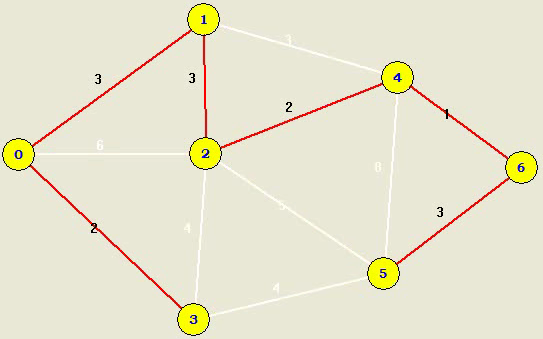

En el siguiente informe se analizará el problema del árbol recubridor mínimo, el cual busca la forma de conectar un conjunto de objetos de la forma más económica posible.

Este es un problema de optimización, ya que se busca reducir el costo total de unir una serie de puntos. Este tiene diversas aplicaciones tales como: Redes de comunicaciones, redes electricas, etc.

Podemos resolver este problema utilizando el algoritmo de Kruskal, el cual se implementa mediante un acercamiento greedy. Esto se evidencia en que este algoritmo ocupa el arco con menos peso disponible y que no cause un loop en el árbol recubridor mínimo ya en construcción.


# Analisis:

1.   ordenar todos los bordes en orden no decreciente de sus pesos. Si no se nos permite cambiar el gráfico dado, podemos crear una copia del gráfico

2.  Se Crean subconjuntos V con elementos individuales

2.   Luego mientras El número de aristas sea igual a V-1 Elija el borde más pequeño e incremente el índice para la próxima iteración

1.   Aun dentro del while Si al incluir el borde seleccionado anteriormente no causa un ciclo, inclúyalo en el resultado e incremente el índice del resultado para el siguiente borde De lo contrario descartar el borde


#2. Kruskal

## 2.1 Codigo

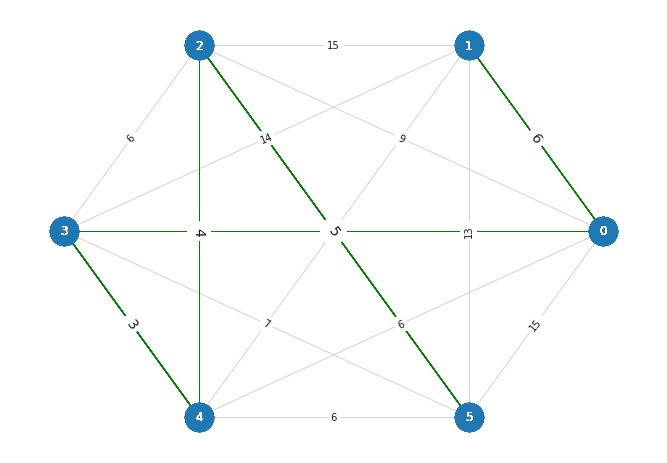

In [24]:

import random
import networkx as nx
import matplotlib.pyplot as plt

def Partition(array, start, end):
  if start>=end: return start
  pivot=array[end-1]
  i,j = start, start
  while j < end-1:

    if array[j][2]>= pivot[2]:
      j=j+1
    else:
      aux = array[j]
      array[j]=array[i]
      array[i]= aux
      i=i+1
      j=j+1
  array[end-1]=array[i]
  array[i]=pivot
  return i

def QuickSort(array,start,end):
  if start+1<end:
    pivot = Partition(array,start,end)
    QuickSort(array,start,pivot)
    QuickSort(array,pivot+1,end)

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 20)])
  
  return graph


def graph_to_nxgraph(graph):
  nxgraph = nx.Graph()
  for i in graph:
    nxgraph.add_edge(i[0], i[1], weight=i[2])
  return nxgraph

def getNodos(graph):
  nodos ={}
  for i in graph:
    nodos[i[0]] = i[0];
    nodos[i[1]] = i[1];
  return nodos

def IsAcyclic(graph, x):
  nodos = getNodos(graph)
  stack =[]
  arcos = [([0]*x) for i in range(x)]
  for n in nodos: 
    nodos[n]="no descubierto"
  for n in graph: 
    arcos[n[0]][n[1]]="disponible"
    arcos[n[1]][n[0]]="disponible"
  for n in nodos.keys():
    stack.append(int(n))
    break
  while len(stack)>0:
    n=stack.pop()
    if nodos[n]=="no descubierto": 
       nodos[n]="descubierto"
       for i in range(x):
          if arcos[n][i] == "disponible":
             arcos[n][i] = "usado"
             arcos[i][n] = "usado"
             stack.append(i)
    elif nodos[n] == "descubierto":
      return False
  return True



def Kruskal(graph,visualize=False,verbose=False):
  if visualize:
    G = graph_to_nxgraph(graph)
    labels = nx.get_edge_attributes(G,'weight')
    pos=nx.circular_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=10)
    nx.draw(G,pos, with_labels=True, node_size=800, font_color="white", font_size=12, font_weight="normal", width  =1.0, edge_color ="lightgray")
  x = len(getNodos(graph))
  QuickSort(graph,0,len(graph))
  if verbose: print("Ordenando los arcos por peso con QuickSort")
  new = []
  for n in graph:
    new.append(n)
    if (IsAcyclic(new,x)): 
      if verbose: print("Agregando el arco entre ", n[0], " y ", n[1])
    else:
      new.pop()
      if verbose: print("No se agrega el arco entre ", n[0], " y ", n[1], ", forma un ciclo")
    if visualize:
      T = graph_to_nxgraph(new)
      labels = nx.get_edge_attributes(T,'weight')
      nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)
      nx.draw(T,pos, with_labels=True, node_size=800, font_color="white", font_size=12, font_weight="normal", width  =1.0, edge_color ="green")

  return new


graph = graph_instance_creator(6)



mst = Kruskal(graph,True)

##2.2 Descripcion del algoritmo

El algoritmo recibe al grafo **G**, el cual tiene un arreglo **V** de nodos (vertices) y un arreglo **E** de arcos (edges).

1. Se define al árbol **T** vacío.

2. Se ordena el arreglo **E** de menor a mayor, usando un algoritmo de ordenamiento como **QuickSort**.

3. Se recorre el arreglo ordenado **E** desde el principio. Se verifica si agregar el arco **E[i]** no genera un ciclo en el arbol **T**, en cuyo caso se agrega a **T**.

4. Una vez recorrido el arreglo **E** se retorna **T**.

Para verificar si el árbol **T** es acíclico, se realizará la siguiente operación.

1. Se crea un diccionario vacío para los nodos, una matriz para los arcos y un stack vacío para realizar **DepthFirstSearch** en **T**.

2. Se elige un nodo y se le asigna como visitado en el diccionario.

3. Se Agregan los nodos alcanzables desde el nodo seleccionado (usando arcos disponibles) al stack y se marcan los arcos como usados.

4. Se repiten los 2 pasos anteriores con el primer nodo del stack. Si el nodo ya fue visitado, entonces se retorna **False**, ya que esto significa que hay un ciclo.

5. Si se explora el arbol sin encontrar un nodo previamente visitado, entonces retorna **True**.




## 2.3 Ejemplo (verbose = True)


Ordenando los arcos por peso con QuickSort
Agregando el arco entre  1  y  3
Agregando el arco entre  0  y  1
Agregando el arco entre  0  y  4
Agregando el arco entre  2  y  4
No se agrega el arco entre  0  y  3 , forma un ciclo
No se agrega el arco entre  1  y  4 , forma un ciclo
No se agrega el arco entre  3  y  4 , forma un ciclo
No se agrega el arco entre  1  y  2 , forma un ciclo
No se agrega el arco entre  0  y  2 , forma un ciclo
No se agrega el arco entre  2  y  3 , forma un ciclo


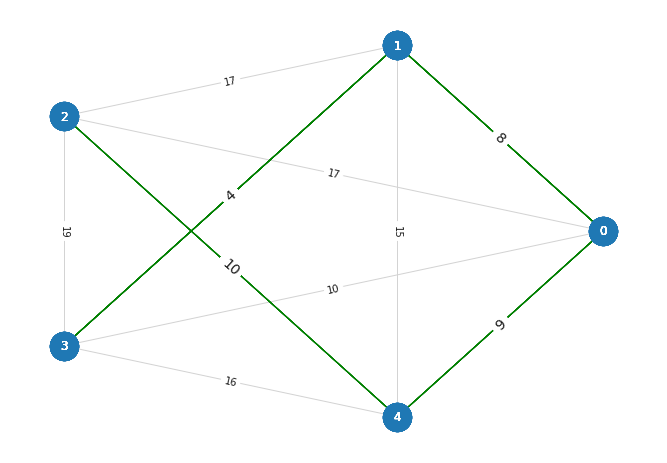

In [25]:
## 2.3 Ejemplo (verbose = True)


graph = graph_instance_creator(5)

mst = Kruskal(graph,True,True)


#3. Tiempo de ejecucion.

***Teorema:*** 

Tiempo de ejecución: $O(E log V)$ 

***Prueba del teorema:***

Como sabemos, $E = arcos$. Para ordenar estos **E** arcos tenemos una complejidad temporal de $O(E * log E)$.

Para agregar arcos al árbol se utiliza la función Union-Find, este tiene como complejidad $O(E * log V)$.

Si sumamos estas dos complejidades nos da como total:

$O(E * log E) + O(E * log V) = **O(E * log E + E * log V)$

La complejidad de kruskal puede ser cualquiera de las dos:

$O(E * log V) = O(E * log E)$

Sin embargo es mejor utilizar $O(E * log V)$ para mayor exactitud.

# Correctitud
Teorema: el algoritmo de Kruskal encuentra un árbol de expansión mínimo.

Prueba: Sea $G = (V, E)$ un gráfico conexo ponderado. Sea $T$ el conjunto de aristas que crece en el algoritmo de Kruskal. La prueba es por inducción matemática sobre el número de aristas en $T$.

Mostramos que si $T$ es prometedor en cualquier etapa del algoritmo, entonces sigue siendo prometedor cuando se le agrega una nueva ventaja en el algoritmo de Kruskal.
Cuando el algoritmo termina, sucederá que $T$ da una solución al problema y por lo tanto un MST.
Base: $T =   \phi$ es prometedor ya que un gráfico conectado ponderado siempre tiene al menos un MST.
Paso de inducción: Sea T prometedor justo antes de agregar una nueva arista $e = ( u , v )$. Los bordes T dividen los nodos de G en uno o más componentes conectados. $u$ y $v$ estarán en dos componentes diferentes. Sea U el conjunto de nodos de la componente que incluye a $u$. Tenga en cuenta que

$U$ es un subconjunto estricto de $V$
$T$ es un conjunto prometedor de aristas tal que ninguna arista en $T$ deja $U$ (ya que una arista $T$ tiene ambos extremos en $U$ o no tiene ningún extremo en $U$)
e es una arista de menor costo que deja U (ya que el algoritmo de Kruskal, siendo codicioso, habría elegido e solo después de examinar aristas más cortas que e)
Las tres condiciones anteriores son precisamente como en el MST Lemma y, por lo tanto, podemos concluir que  $T{ e }$ también es prometedor. Cuando el algoritmo se detiene, T proporciona no solo un árbol de expansión, sino un árbol de expansión mínimo, ya que es prometedor. 

#Experimentos: 

In [3]:
import random

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def graph_instance_creator(V):
  graph = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      graph.addEdge(i, j, random.randint(1, 500))
  
  return graph

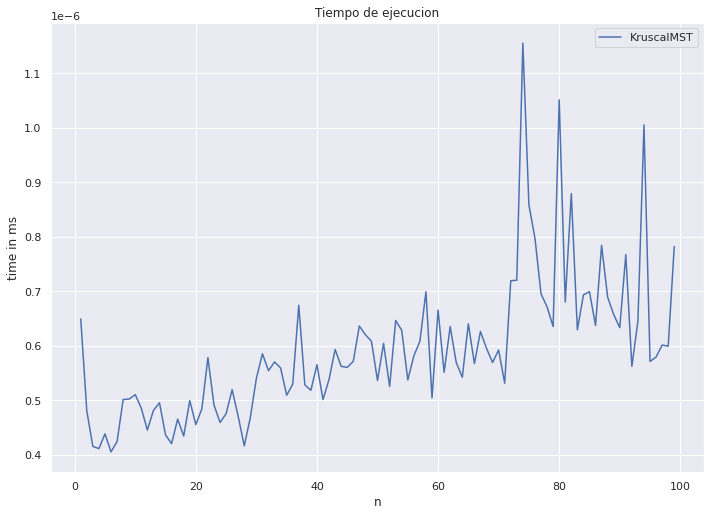

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; 
y=[]; 

for n in range(1,100):
  a= graph_instance_creator(n)

  t = repeat(stmt=f"{a.KruskalMST()}", repeat=1, number=10)
  
  x.append(n)
  y.append(t)


plt.plot(x,y)

plt.legend(["KruscalMST"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Analisis 
Como se puede observar, a medida que aumenta la cantidad de nodos, el tiempo de ejecución aumenta. Esto ocurre ya que el algortimo utilíza el método Greedy, es decir, busca la forma más facil y rápida para resolver el problema.